In [1]:
import torch
from directed_graphs.multiscale_flow_embedder import MultiscaleDiffusionFlowEmbedder
from directed_graphs.datasets import directed_swiss_roll
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
X, flow, labels = directed_swiss_roll()
lw = {"diffusion":0,"smoothness":0,"reconstruction":0,"diffusion map regularization":1,"flow cosine loss":1}

In [3]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [4]:
MFE = MultiscaleDiffusionFlowEmbedder(X, flow, device=device, loss_weights=lw).to(device)

In [5]:
MFE.fit(n_steps=1000)

100%|██████████| 1000/1000 [00:12<00:00, 83.17it/s]


(tensor([[-0.7678, -0.6045],
         [-0.8177, -0.6384],
         [-0.8620, -0.6686],
         ...,
         [-8.9781, -8.1726],
         [-8.8427, -8.0682],
         [-8.9642, -8.1256]], device='cuda:0', grad_fn=<AddmmBackward0>),
 Sequential(
   (0): Linear(in_features=2, out_features=4, bias=True)
   (1): LeakyReLU(negative_slope=0.01)
   (2): Linear(in_features=4, out_features=8, bias=True)
   (3): LeakyReLU(negative_slope=0.01)
   (4): Linear(in_features=8, out_features=4, bias=True)
   (5): LeakyReLU(negative_slope=0.01)
   (6): Linear(in_features=4, out_features=2, bias=True)
 ),
 {'diffusion': [],
  'smoothness': [],
  'reconstruction': [],
  'diffusion map regularization': [tensor(0.6850, device='cuda:0', grad_fn=<DivBackward0>),
   tensor(0.6777, device='cuda:0', grad_fn=<DivBackward0>),
   tensor(0.6703, device='cuda:0', grad_fn=<DivBackward0>),
   tensor(0.6627, device='cuda:0', grad_fn=<DivBackward0>),
   tensor(0.6554, device='cuda:0', grad_fn=<DivBackward0>),
   tensor(

In [6]:
MFE.visualize_points(labels)

AttributeError: 'MultiscaleDiffusionFlowEmbedder' object has no attribute 'grid'

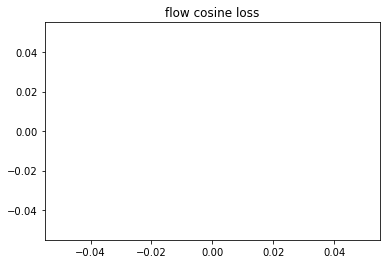

In [7]:
MFE.visualize_loss("flow cosine loss")

In [8]:
MFE.losses["diffusion"][0].detach().cpu().numpy()

IndexError: list index out of range

In [9]:
!nvidia-smi

Fri Jul 15 12:26:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   27C    P0    36W / 250W |   4452MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------